# Lab 5- Data Analysis

Exercises 1-4 are to be completed by March 24. The remaider of the lab is due March 21.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms.

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS:
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [6]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  6415k      0 --:--:--  0:02:20 --:--:-- 10.1M


In [ ]:
!gunzip SUSY.csv.gz

In [ ]:
ls -lh

total 4677032
-rw-r--r--  1 miemie  staff   978K Mar 23 16:47 Lab.5.ipynb
-rw-r--r--  1 miemie  staff   2.2G Mar 23 16:46 SUSY.csv


The data is provided as a comma separated file.

In [ ]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [1]:
!ls -lh

total 4.0K
drwxr-xr-x 1 root root 4.0K Mar 24 13:34 sample_data


We see that we have 5 million datapoints.

In [2]:
!wc -l SUSY.csv

wc: SUSY.csv: No such file or directory


We create a new file of the first half
million. This is sufficient for our needs in this lab:

In [3]:
!head -500000 SUSY.csv > SUSY-small.csv

head: cannot open 'SUSY.csv' for reading: No such file or directory


In [4]:
ls -lh

total 4.0K
drwxr-xr-x 1 root root 4.0K Mar 24 13:34 sample_data/
-rw-r--r-- 1 root root    0 Mar 28 19:49 SUSY-small.csv


In [5]:
! wc -l SUSY-small.csv

0 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [ ]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [ ]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [ ]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [ ]:
FeatureNames

['M_Delta_R',
 'axial_MET',
 'MET_rel',
 'dPhi_r_b',
 'R',
 'S_R',
 'M_R',
 'cos_theta_r1',
 'MT2',
 'M_TR_2']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [ ]:
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [ ]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [ ]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


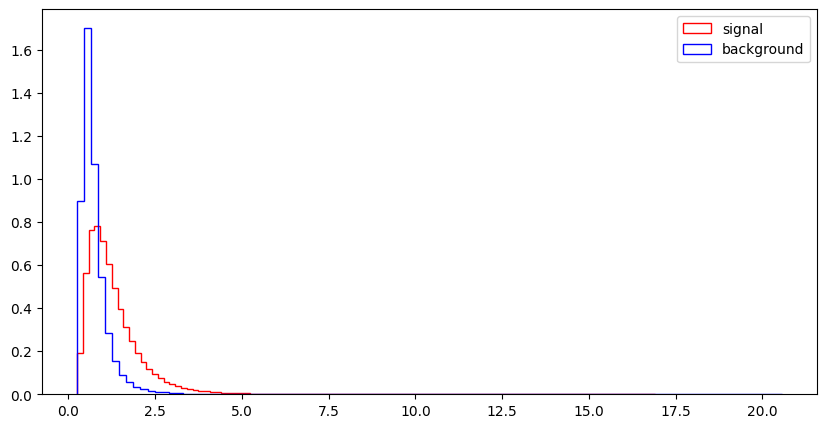

l_1_eta


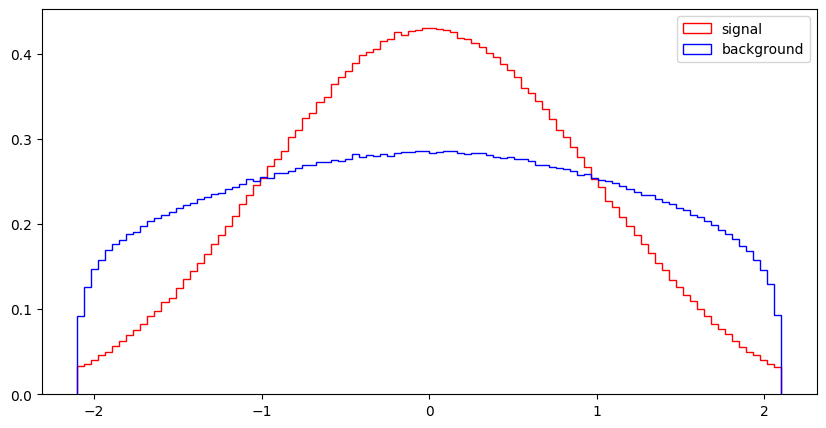

l_1_phi


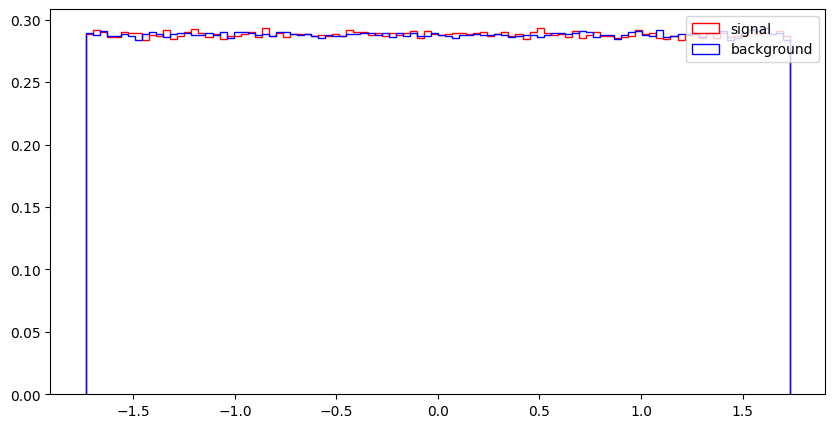

l_2_pT


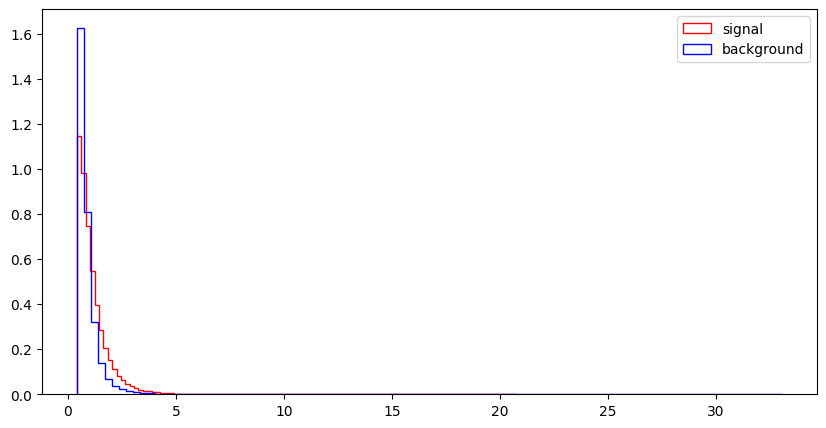

l_2_eta


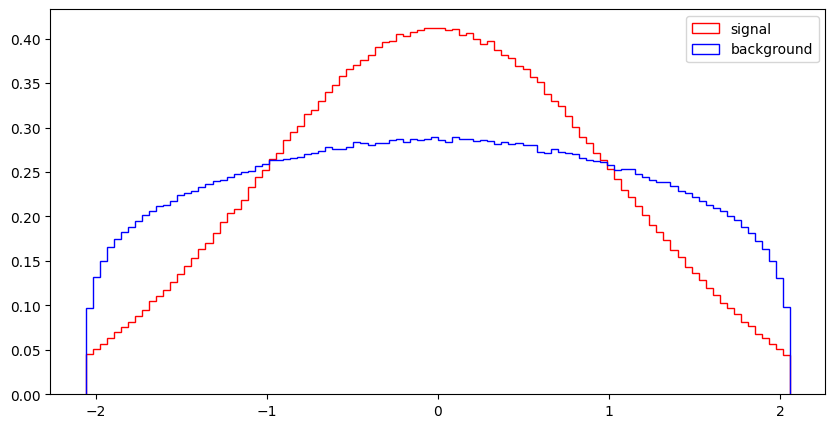

l_2_phi


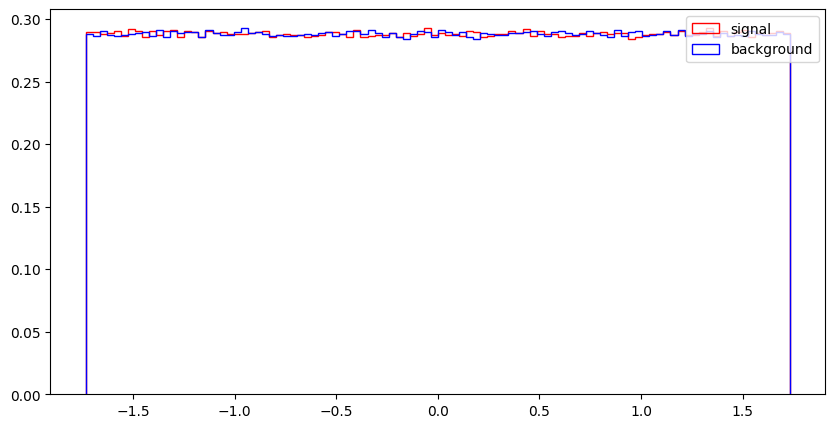

MET


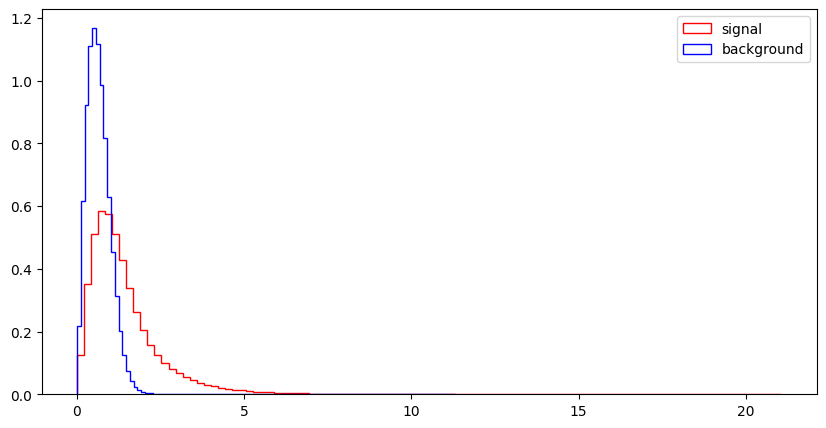

MET_phi


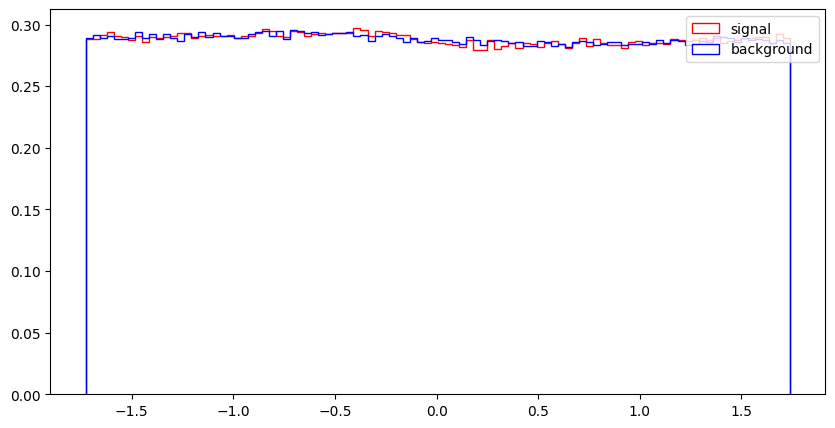

MET_rel


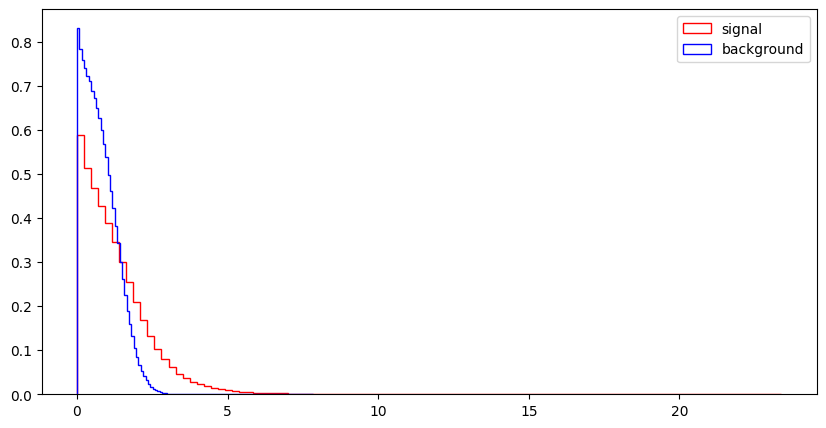

axial_MET


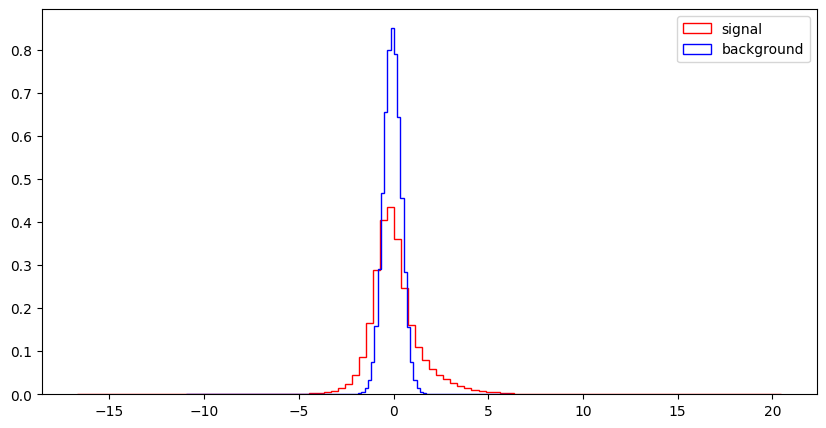

M_R


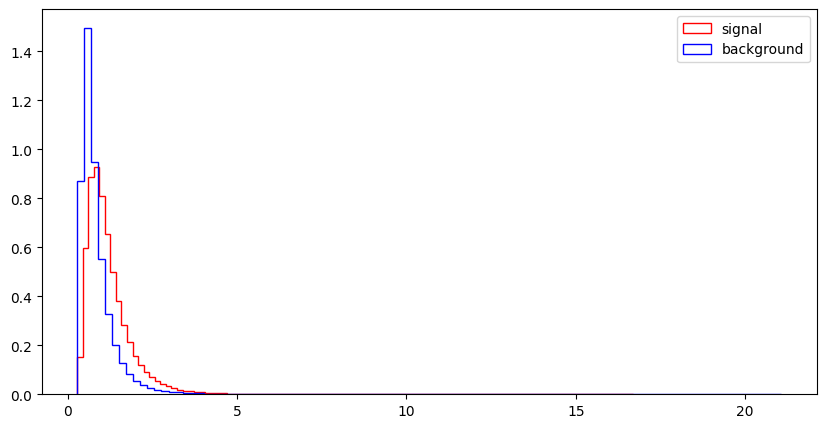

M_TR_2


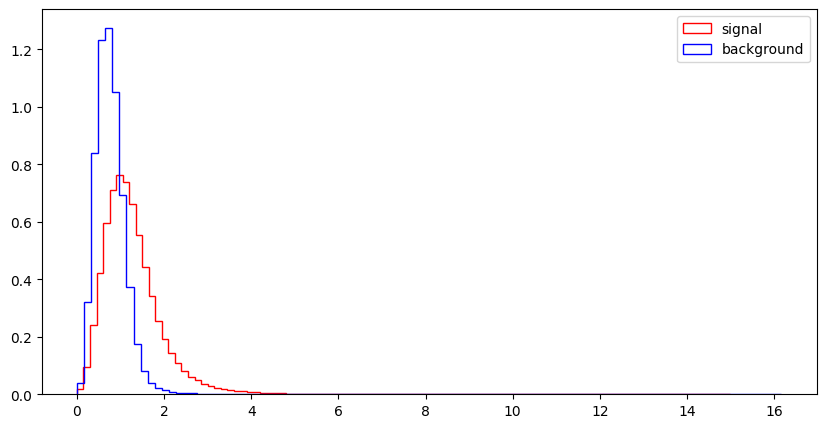

R


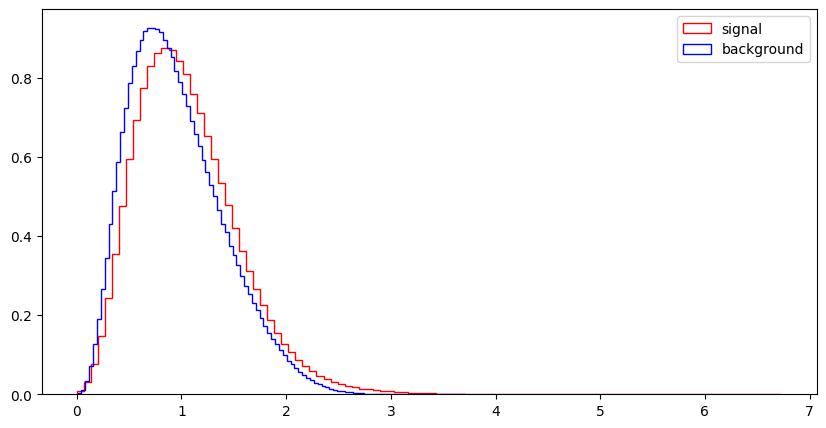

MT2


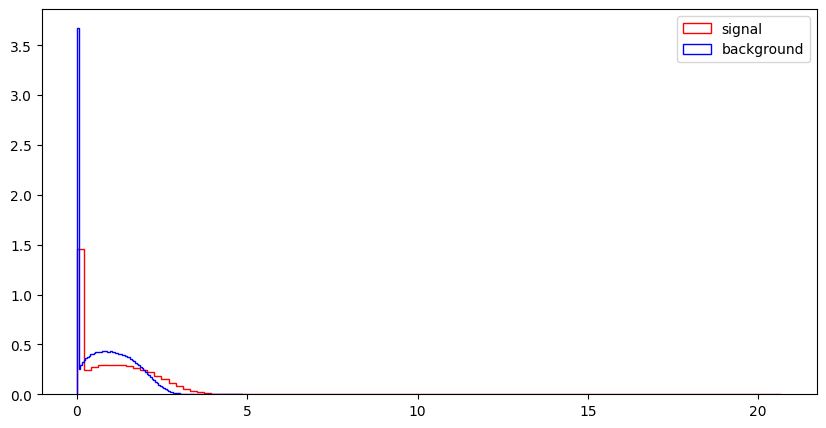

S_R


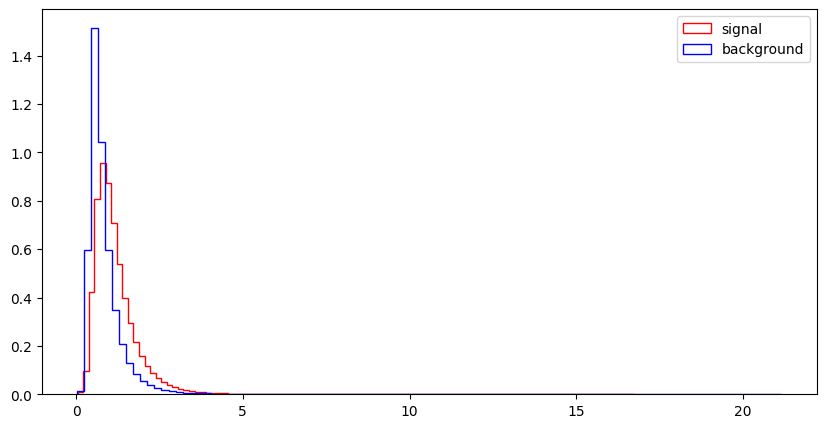

M_Delta_R


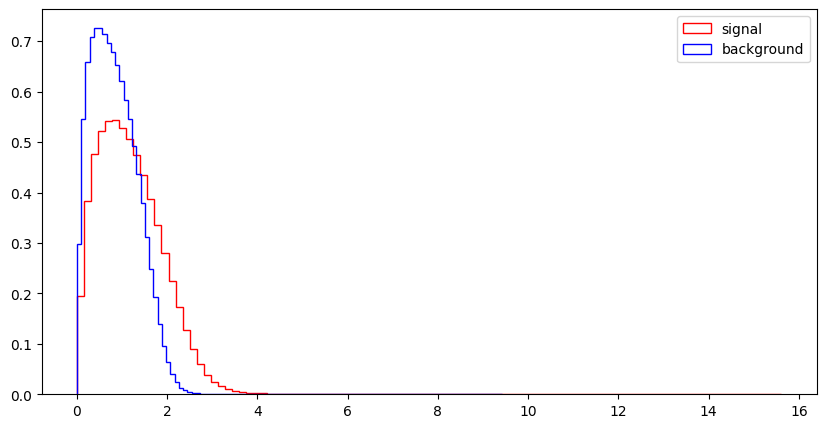

dPhi_r_b


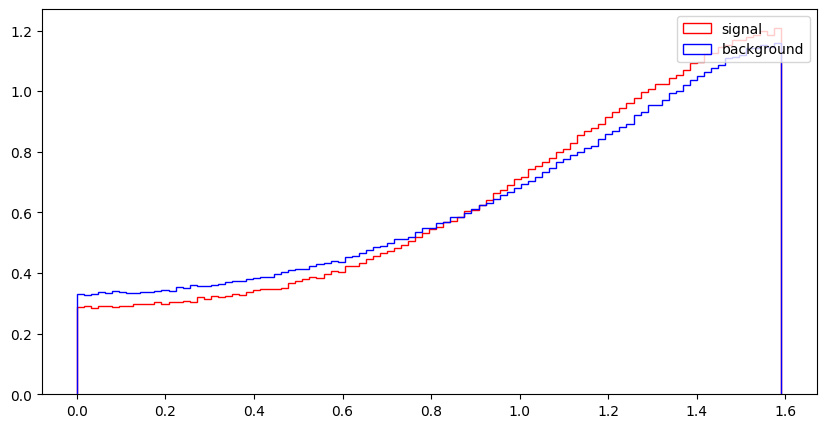

cos_theta_r1


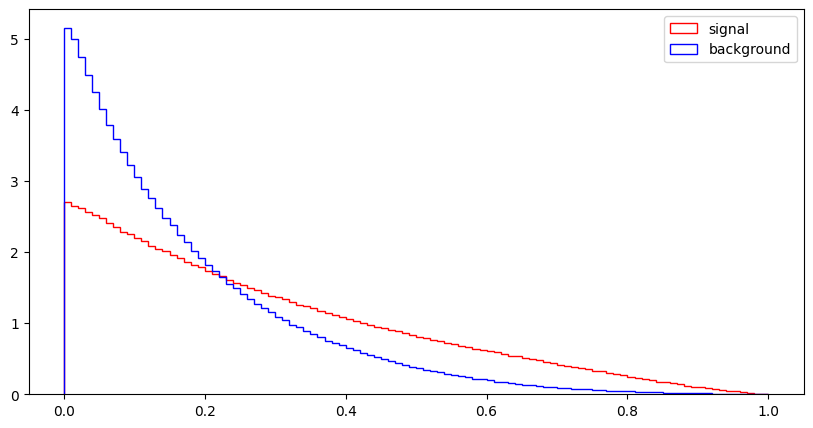

In [ ]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots.

### Figure 5
Since in SUSY file does not contain all the feature in Figure 5 so there are two graphs of Lepton 1pT and Lepton 2pT are shown

In [ ]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df_sig=normalized_df[normalized_df.signal==1]
normalized_df_bkg=normalized_df[normalized_df.signal==0]

normalized_df_sig

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.0,0.069615,0.515424,0.146879,0.002377,0.417663,0.982085,0.164947,0.146485,0.000554,0.550812,0.037421,0.035075,0.071314,0.000000,0.019932,0.012871,0.830512,0.377584
2,1.0,0.009358,0.468216,0.295368,0.000709,0.108141,0.278343,0.057890,0.643387,0.078304,0.437752,0.012446,0.058177,0.235614,0.097858,0.027274,0.099808,0.713377,0.180910
3,1.0,0.006226,0.267992,0.699770,0.000625,0.716446,0.304672,0.096485,0.940121,0.130258,0.422328,0.014517,0.062736,0.234824,0.075022,0.034740,0.109615,0.937547,0.090719
4,1.0,0.051980,0.336027,0.305084,0.035597,0.331627,0.679500,0.051608,0.387962,0.025194,0.486047,0.043828,0.059829,0.107965,0.000000,0.049980,0.002497,0.725566,0.094859
8,1.0,0.091530,0.676867,0.404726,0.011552,0.492937,0.082886,0.109152,0.916299,0.127814,0.398421,0.056603,0.157563,0.232224,0.115711,0.072295,0.137355,0.740810,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,1.0,0.034300,0.256344,0.712049,0.019746,0.192009,0.106324,0.023532,0.100457,0.001174,0.455829,0.027580,0.044846,0.113508,0.000000,0.037372,0.018942,0.476583,0.259673
4999988,1.0,0.087933,0.702630,0.536086,0.015505,0.633884,0.266052,0.076061,0.252207,0.008938,0.460430,0.053038,0.097926,0.152070,0.009786,0.050911,0.038486,0.464548,0.612186
4999991,1.0,0.038270,0.654279,0.034032,0.003200,0.903697,0.141370,0.033532,0.552808,0.018539,0.438776,0.026063,0.067190,0.176782,0.095347,0.031748,0.099925,0.022216,0.504437
4999995,1.0,0.029482,0.271408,0.071337,0.007655,0.619779,0.975001,0.087505,0.577908,0.043833,0.409393,0.030063,0.104133,0.248476,0.162731,0.048254,0.169271,0.872816,0.364599


In [ ]:
normalized_df_bkg

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.035371,0.655669,0.838999,0.022344,0.077551,0.247887,0.026936,0.447579,0.034638,0.442559,0.079515,0.054968,0.060739,0.055381,0.090192,0.063425,0.859364,0.040714
5,0.0,0.009928,0.761630,0.935905,0.009912,0.655075,0.285967,0.015300,0.878991,0.007248,0.459021,0.010666,0.025679,0.111868,0.014684,0.020531,0.021852,0.460677,0.186044
6,0.0,0.009012,0.233806,0.114700,0.002261,0.082979,0.793127,0.010222,0.365048,0.013840,0.454013,0.006949,0.022856,0.118323,0.032455,0.016974,0.032741,0.301012,0.029058
7,0.0,0.015606,0.549080,0.622758,0.004598,0.725100,0.182400,0.005520,0.944940,0.007458,0.455352,0.012296,0.017868,0.072767,0.016175,0.023049,0.016897,0.198406,0.125728
9,0.0,0.036800,0.387948,0.660129,0.024681,0.804766,0.196522,0.020759,0.113635,0.013976,0.446345,0.056150,0.046652,0.069062,0.021973,0.067171,0.037658,0.832588,0.083014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999993,0.0,0.053421,0.083017,0.692356,0.026091,0.469408,0.204371,0.047276,0.086999,0.043002,0.435107,0.064825,0.079051,0.104050,0.026191,0.076785,0.072720,0.789209,0.159157
4999994,0.0,0.023240,0.523561,0.235542,0.001514,0.427698,0.902971,0.017686,0.721501,0.021750,0.448261,0.013154,0.038142,0.150243,0.036053,0.022706,0.038057,0.195931,0.428370
4999996,0.0,0.034323,0.533305,0.914125,0.013858,0.414505,0.286360,0.013793,0.286855,0.000058,0.456274,0.025738,0.033669,0.089266,0.000145,0.034160,0.025415,0.278622,0.239953
4999997,0.0,0.028845,0.837689,0.148726,0.023524,0.911611,0.691276,0.023287,0.351211,0.030115,0.450576,0.026802,0.044693,0.115347,0.036398,0.038420,0.039053,0.760586,0.026692


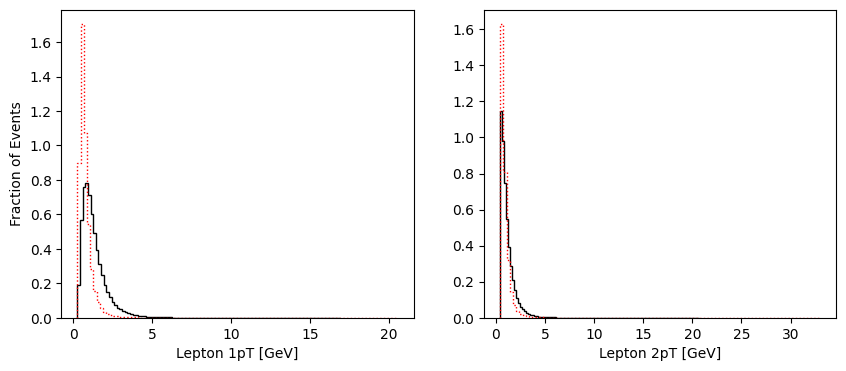

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10, 4))

axs[0].hist(np.array(df_sig['l_1_pT']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[0].hist(np.array(df_bkg['l_1_pT']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[0].set(xlabel='Lepton 1pT [GeV]', ylabel='Fraction of Events')

axs[1].hist(np.array(df_sig['l_2_pT']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[1].hist(np.array(df_bkg['l_2_pT']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[1].set(xlabel='Lepton 2pT [GeV]')
plt.show()

### Figure 6
The SUSY file does not contain the data for (c), (d) in figure 6 so all the data are graph in below

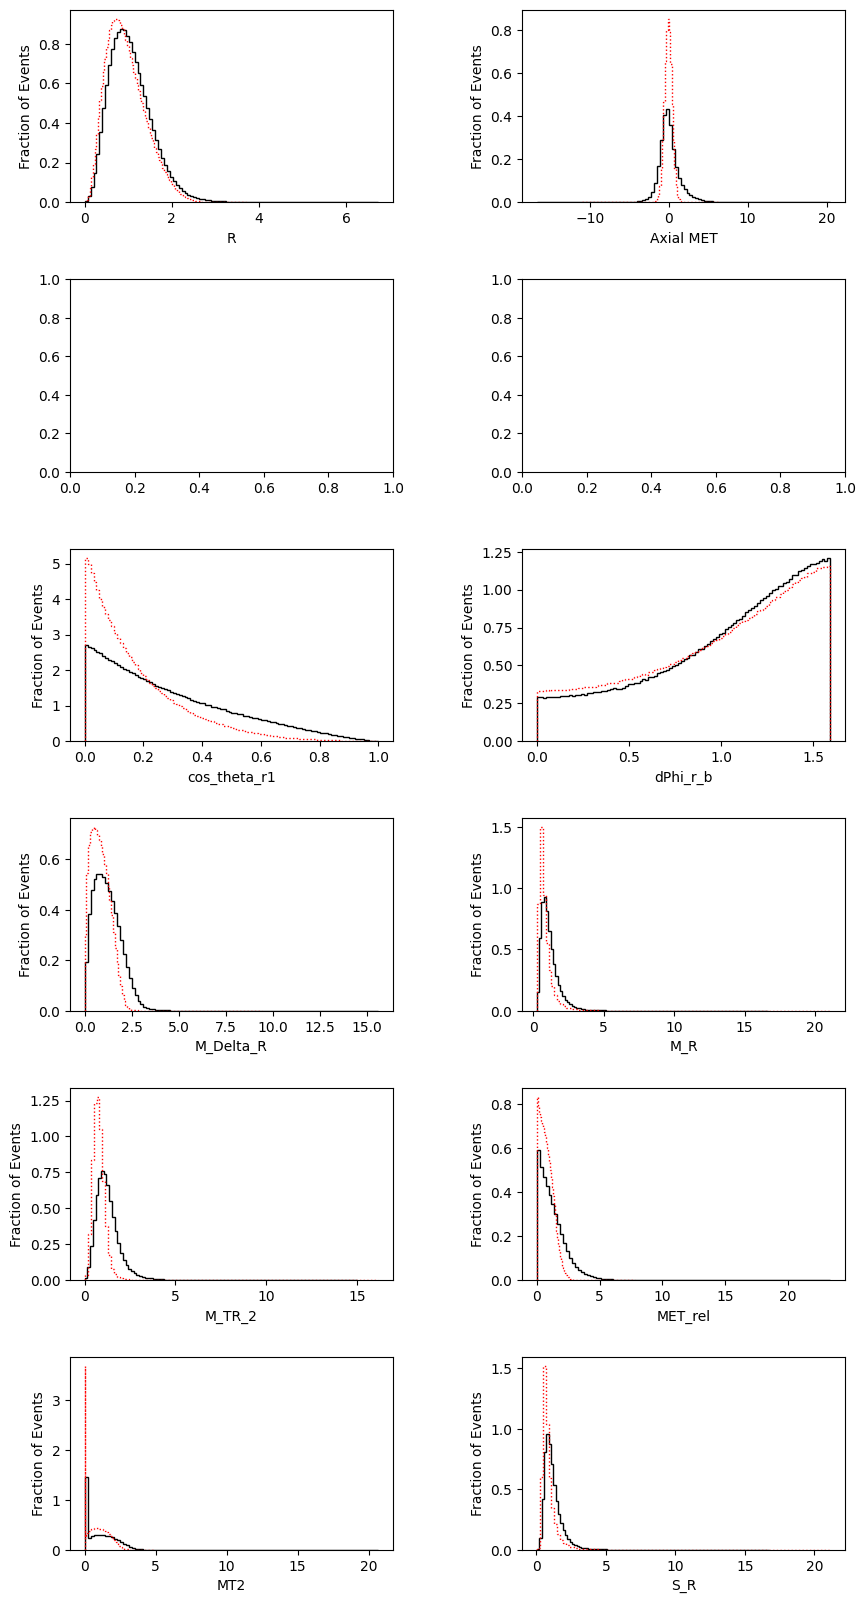

In [ ]:
fig, axs = plt.subplots(6,2,figsize=(10, 20),
                       gridspec_kw={
                           'width_ratios': [4,4],
                           'height_ratios': [4,4,4,4,4,4],
                       'wspace': 0.4,
                       'hspace': 0.4})

axs[0,0].hist(np.array(df_sig['R']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[0,0].hist(np.array(df_bkg['R']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[0,0].set(xlabel='R', ylabel='Fraction of Events')

axs[0,1].hist(np.array(df_sig['axial_MET']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[0,1].hist(np.array(df_bkg['axial_MET']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[0,1].set(xlabel='Axial MET',ylabel='Fraction of Events')

axs[2,0].hist(np.array(df_sig['cos_theta_r1']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[2,0].hist(np.array(df_bkg['cos_theta_r1']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[2,0].set(xlabel='cos_theta_r1',ylabel='Fraction of Events')

axs[2,1].hist(np.array(df_sig['dPhi_r_b']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[2,1].hist(np.array(df_bkg['dPhi_r_b']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[2,1].set(xlabel='dPhi_r_b',ylabel='Fraction of Events')

axs[3,0].hist(np.array(df_sig['M_Delta_R']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[3,0].hist(np.array(df_bkg['M_Delta_R']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[3,0].set(xlabel='M_Delta_R', ylabel='Fraction of Events')

axs[3,1].hist(np.array(df_sig['M_R']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[3,1].hist(np.array(df_bkg['M_R']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[3,1].set(xlabel='M_R',ylabel='Fraction of Events')

axs[4,0].hist(np.array(df_sig['M_TR_2']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[4,0].hist(np.array(df_bkg['M_TR_2']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[4,0].set(xlabel='M_TR_2',ylabel='Fraction of Events')

axs[4,1].hist(np.array(df_sig['MET_rel']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[4,1].hist(np.array(df_bkg['MET_rel']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[4,1].set(xlabel='MET_rel',ylabel='Fraction of Events')

axs[5,0].hist(np.array(df_sig['MT2']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[5,0].hist(np.array(df_bkg['MT2']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[5,0].set(xlabel='MT2',ylabel='Fraction of Events')

axs[5,1].hist(np.array(df_sig['S_R']),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
axs[5,1].hist(np.array(df_bkg['S_R']),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
axs[5,1].set(xlabel='S_R',ylabel='Fraction of Events')

plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to [Data 1401 Visualization Lecture](https://github.com/UTA-DataScience/DATA1401.2020.Fall/blob/master/Lectures/Lecture.36/Lecture.36.ipynb) for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

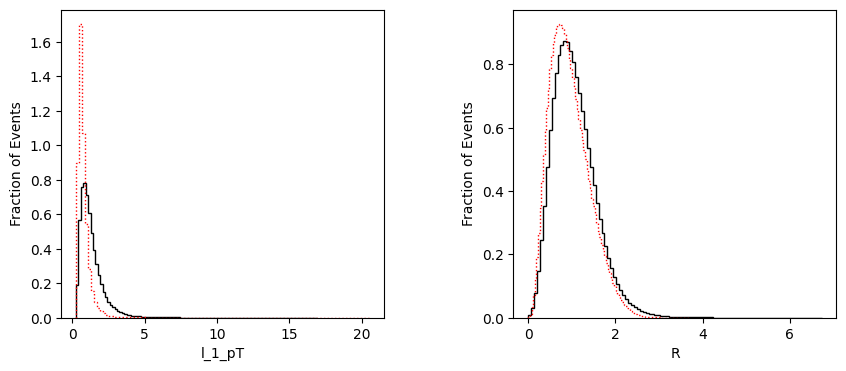

In [ ]:
def pair_plot(data1,data2,df): #Part a
    df_sig=df[df.signal==1]
    df_bkg=df[df.signal==0]

    fig, axs = plt.subplots(1,2,figsize=(10, 4),
                       gridspec_kw={
                           'width_ratios': [4,4],
                           'height_ratios': [4],
                       'wspace': 0.4,
                       'hspace': 0.4})
    axs[0].hist(np.array(df_sig[data1]),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
    axs[0].hist(np.array(df_bkg[data1]),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
    axs[0].set(xlabel=data1, ylabel='Fraction of Events')

    axs[1].hist(np.array(df_sig[data2]),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
    axs[1].hist(np.array(df_bkg[data2]),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
    axs[1].set(xlabel=data2, ylabel='Fraction of Events')

    return axs[0],axs[1]

pair_plot('l_1_pT','R',df)
plt.show()

(<AxesSubplot:xlabel='l_1_pT', ylabel='Fraction of Events'>,
 <AxesSubplot:xlabel='R', ylabel='Fraction of Events'>)

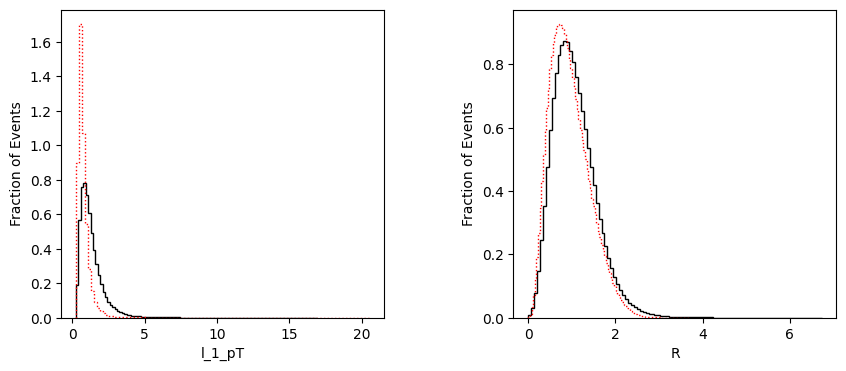

In [ ]:
def pair_plot_faster(data1,data2,df_sig,df_bkg): #Part b
    fig, axs = plt.subplots(1,2,figsize=(10, 4),
                       gridspec_kw={
                           'width_ratios': [4,4],
                           'height_ratios': [4],
                       'wspace': 0.4,
                       'hspace': 0.4})
    axs[0].hist(np.array(df_sig[data1]),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
    axs[0].hist(np.array(df_bkg[data1]),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
    axs[0].set(xlabel=data1, ylabel='Fraction of Events')

    axs[1].hist(np.array(df_sig[data2]),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
    axs[1].hist(np.array(df_bkg[data2]),bins=100,histtype="step", color="red", linestyle="dotted", label="background",density=1, stacked=True)
    axs[1].set(xlabel=data2, ylabel='Fraction of Events')

    return axs[0],axs[1]

df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

pair_plot_faster('l_1_pT','R',df_sig,df_bkg)


Part c

M_TR_2, M_R, S_R, and MET seem to give the best separation of all available observables.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate).

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [ ]:
pip install tabulate


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [ ]:
#Part b
all_observables_cov = list()
for var in VarNames[1:]:
    cov = np.cov(np.array(df[var]))
    all_observables_cov.append((var,float(cov)))
all_observables_cov

[('l_1_pT', 0.47242812598904776),
 ('l_1_eta', 1.0062240012664616),
 ('l_1_phi', 1.003342204575137),
 ('l_2_pT', 0.4280037907363826),
 ('l_2_eta', 1.0056857174171172),
 ('l_2_phi', 1.0032648712944368),
 ('MET', 0.7619328565059023),
 ('MET_phi', 1.003311494342967),
 ('MET_rel', 0.7923969567041195),
 ('axial_MET', 1.0031895596327354),
 ('M_R', 0.3954455636133476),
 ('M_TR_2', 0.3411890761706418),
 ('R', 0.2216909091237603),
 ('MT2', 0.7383090338392225),
 ('S_R', 0.3852889613732403),
 ('M_Delta_R', 0.38908551606899916),
 ('dPhi_r_b', 0.19017871227823793),
 ('cos_theta_r1', 0.03880128869147462)]

In [ ]:
all_observables_corrcoef = list()
for var in VarNames[1:]:
    corrcoef = np.corrcoef(np.array(df[var]))
    all_observables_corrcoef.append((var,corrcoef))
all_observables_corrcoef

[('l_1_pT', 1.0),
 ('l_1_eta', 1.0),
 ('l_1_phi', 1.0),
 ('l_2_pT', 1.0),
 ('l_2_eta', 1.0),
 ('l_2_phi', 1.0),
 ('MET', 1.0),
 ('MET_phi', 1.0),
 ('MET_rel', 1.0),
 ('axial_MET', 1.0),
 ('M_R', 1.0),
 ('M_TR_2', 1.0),
 ('R', 1.0),
 ('MT2', 1.0),
 ('S_R', 1.0),
 ('M_Delta_R', 1.0),
 ('dPhi_r_b', 1.0),
 ('cos_theta_r1', 1.0)]

In [ ]:
#Partc
display(HTML(tabulate.tabulate(all_observables_cov, tablefmt='html', headers=["Observables","Covaraiance"])))
display(HTML(tabulate.tabulate(all_observables_corrcoef, tablefmt='html', headers=["Observables","Correlation"])))

Observables,Covaraiance
l_1_pT,0.472428
l_1_eta,1.00622
l_1_phi,1.00334
l_2_pT,0.428004
l_2_eta,1.00569
l_2_phi,1.00326
MET,0.761933
MET_phi,1.00331
MET_rel,0.792397
axial_MET,1.00319


Observables,Correlation
l_1_pT,1
l_1_eta,1
l_1_phi,1
l_2_pT,1
l_2_eta,1
l_2_phi,1
MET,1
MET_phi,1
MET_rel,1
axial_MET,1


In [ ]:
#Part d
def all_in_one(df):
    all_observables_cov = list()
    all_observables_corrcoef = list()

    for var in VarNames[1:]:
        cov = np.cov(np.array(df[var]))
        all_observables_cov.append((var,float(cov)))

    for var in VarNames[1:]:
        corrcoef = np.corrcoef(np.array(df[var]))
        all_observables_corrcoef.append((var,corrcoef))

    cov = display(HTML(tabulate.tabulate(all_observables_cov, tablefmt='html', headers=["Observables","Covaraiance"])))
    corrcoef = display(HTML(tabulate.tabulate(all_observables_corrcoef, tablefmt='html', headers=["Observables","Correlation"])))

    return cov, corrcoef


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal:

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable.

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

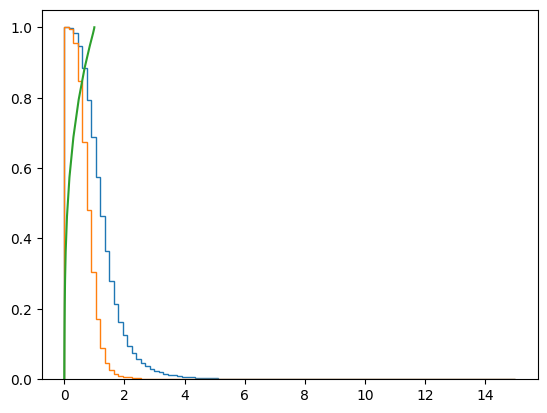

In [ ]:
TPR,bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=-1,density=True)
FPR,bins_sig,_=plt.hist(df_bkg["M_TR_2"],bins=bins_sig,histtype="step",cumulative=-1,density=True)
plt.plot(FPR,TPR)

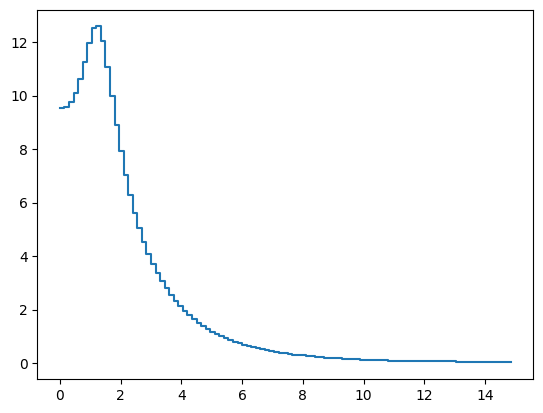

In [ ]:
n_bkg_expected = 10000
n_sig_expected = 1000

n_sig_expected_prime = n_sig_expected * TPR
n_bkg_expected_prime = n_bkg_expected * FPR

sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
plt.step(bins_sig[:-1],sig)

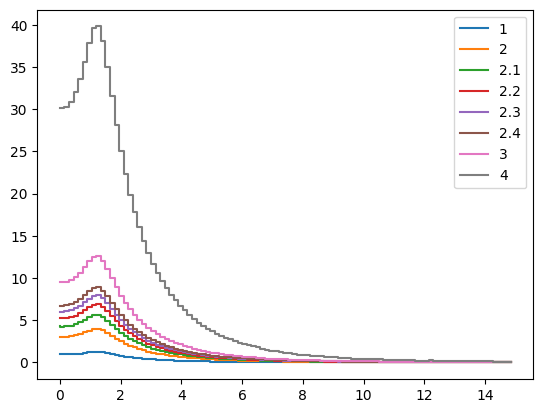

{'1': (9,
  3.6321277788923725,
  4.698005878683211,
  1.258447591175229,
  1.350293831230374),
 '2': (9,
  36.32127778892372,
  46.9800587868321,
  3.9795607040661367,
  1.350293831230374),
 '2.1': (9,
  72.64255557784745,
  93.9601175736642,
  5.627948719977353,
  1.350293831230374),
 '2.2': (9,
  108.96383336677117,
  140.9401763604963,
  6.892801331247122,
  1.350293831230374),
 '2.3': (9,
  145.2851111556949,
  187.9202351473284,
  7.959121408132273,
  1.350293831230374),
 '2.4': (9,
  181.6063889446186,
  234.90029393416052,
  8.898568254878805,
  1.350293831230374),
 '3': (9,
  363.2127778892372,
  469.80058786832103,
  12.584475911752289,
  1.350293831230374),
 '4': (9,
  3632.127778892372,
  4698.0058786832105,
  39.795607040661366,
  1.350293831230374)}

In [ ]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])

    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

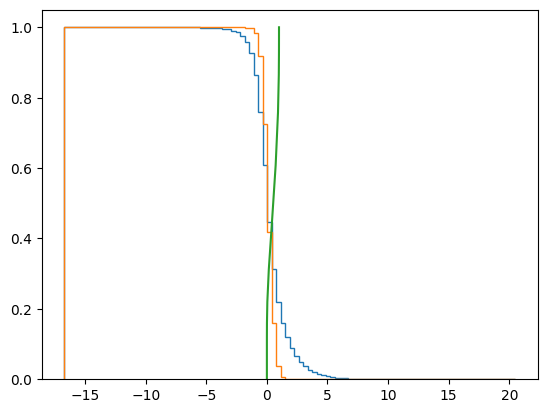

In [ ]:
TPR,bins_sig,_=plt.hist(df_sig["axial_MET"],bins=100,histtype="step",cumulative=-1,density=True)
FPR,bins_sig,_=plt.hist(df_bkg["axial_MET"],bins=bins_sig,histtype="step",cumulative=-1,density=True)
plt.plot(FPR,TPR)

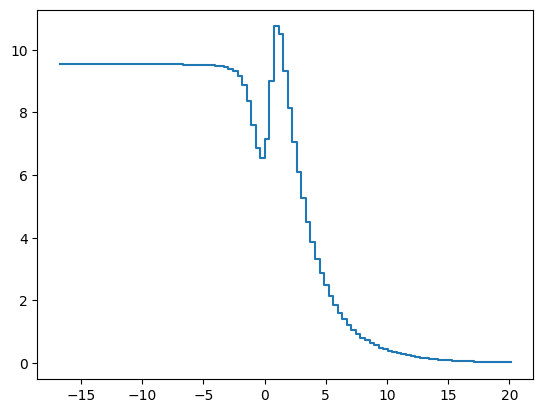

In [ ]:
n_bkg_expected = 10000
n_sig_expected = 1000

n_sig_expected_prime = n_sig_expected * TPR
n_bkg_expected_prime = n_bkg_expected * FPR

sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
plt.step(bins_sig[:-1],sig)

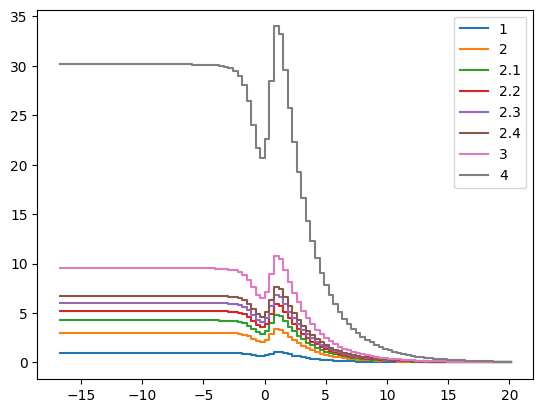

{'1': (48,
  1.6019567913133292,
  0.6205356369228658,
  1.0745599573773434,
  1.1405042266845697),
 '2': (48,
  16.019567913133294,
  6.205356369228658,
  3.3980569477258586,
  1.1405042266845697),
 '2.1': (48,
  32.03913582626659,
  12.410712738457317,
  4.805578221190032,
  1.1405042266845697),
 '2.2': (48,
  48.058703739399874,
  18.616069107685977,
  5.885607280473607,
  1.1405042266845697),
 '2.3': (48,
  64.07827165253318,
  24.821425476914634,
  6.796113895451717,
  1.1405042266845697),
 '2.4': (48,
  80.09783956566646,
  31.026781846143294,
  7.598286326530469,
  1.1405042266845697),
 '3': (48,
  160.19567913133292,
  62.05356369228659,
  10.745599573773433,
  1.1405042266845697),
 '4': (48,
  1601.9567913133292,
  620.5356369228658,
  33.98056947725859,
  1.1405042266845697)}

In [ ]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])

    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

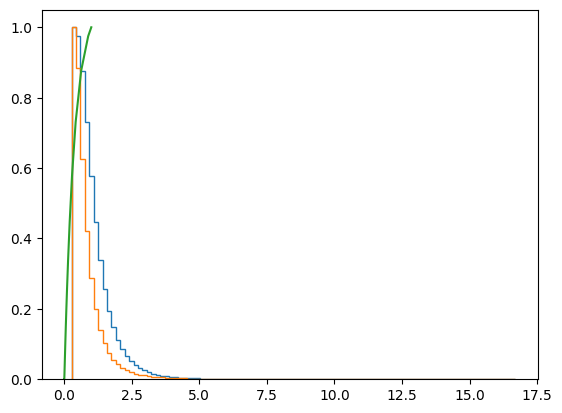

In [ ]:
TPR,bins_sig,_=plt.hist(df_sig["M_R"],bins=100,histtype="step",cumulative=-1,density=True)
FPR,bins_sig,_=plt.hist(df_bkg["M_R"],bins=bins_sig,histtype="step",cumulative=-1,density=True)
plt.plot(FPR,TPR)

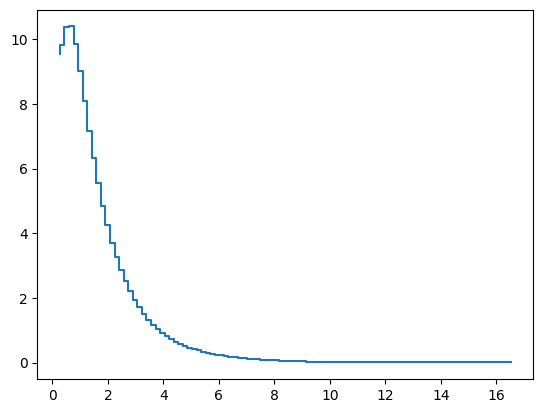

In [ ]:
n_bkg_expected = 10000
n_sig_expected = 1000

n_sig_expected_prime = n_sig_expected * TPR
n_bkg_expected_prime = n_bkg_expected * FPR

sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
plt.step(bins_sig[:-1],sig)

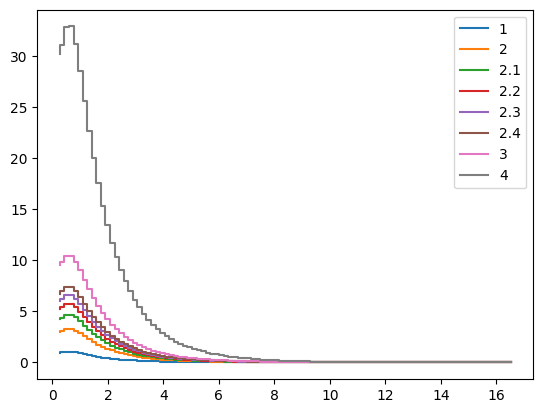

{'1': (3,
  7.310224942707643,
  42.1494773348298,
  1.0394533229041192,
  0.7607397422194482),
 '2': (3,
  73.10224942707644,
  421.494773348298,
  3.2870400218074853,
  0.7607397422194482),
 '2.1': (3,
  146.2044988541529,
  842.989546696596,
  4.648576578903301,
  0.7607397422194482),
 '2.2': (3,
  219.30674828122932,
  1264.484320044894,
  5.693320324282875,
  0.7607397422194482),
 '2.3': (3,
  292.4089977083058,
  1685.979093393192,
  6.574080043614971,
  0.7607397422194482),
 '2.4': (3,
  365.5112471353822,
  2107.47386674149,
  7.350044933523928,
  0.7607397422194482),
 '3': (3,
  731.0224942707644,
  4214.94773348298,
  10.394533229041194,
  0.7607397422194482),
 '4': (3,
  7310.224942707644,
  42149.4773348298,
  32.870400218074856,
  0.7607397422194482)}

In [ ]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])

    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

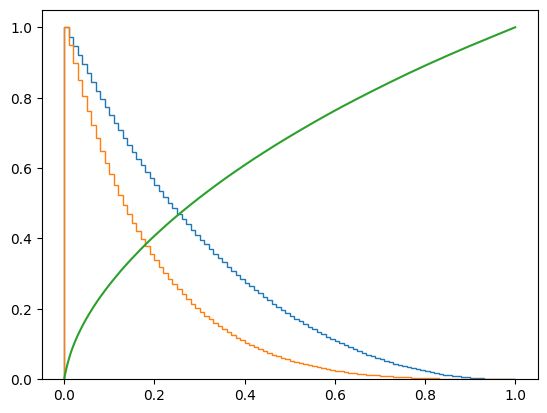

In [ ]:
TPR,bins_sig,_=plt.hist(df_sig["cos_theta_r1"],bins=100,histtype="step",cumulative=-1,density=True)
FPR,bins_sig,_=plt.hist(df_bkg["cos_theta_r1"],bins=bins_sig,histtype="step",cumulative=-1,density=True)
plt.plot(FPR,TPR)

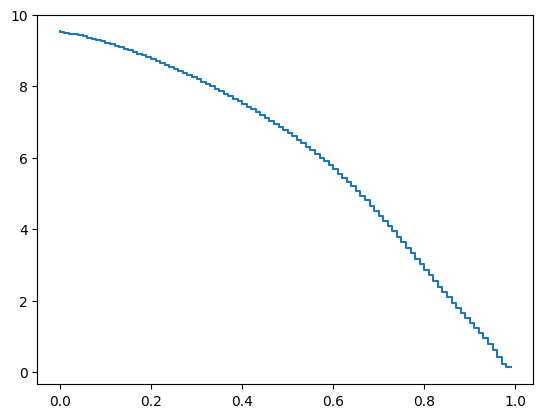

In [ ]:
n_bkg_expected = 10000
n_sig_expected = 1000

n_sig_expected_prime = n_sig_expected * TPR
n_bkg_expected_prime = n_bkg_expected * FPR

sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
plt.step(bins_sig[:-1],sig)

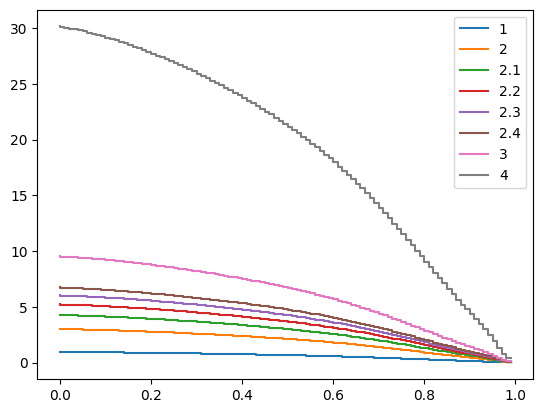

{'1': (0, 10.0, 99.99999999999999, 0.9534625892455924, 1.50256994402298e-07),
 '2': (0, 100.0, 999.9999999999999, 3.015113445777636, 1.50256994402298e-07),
 '2.1': (0,
  200.0,
  1999.9999999999998,
  4.264014327112208,
  1.50256994402298e-07),
 '2.2': (0,
  300.0,
  2999.9999999999995,
  5.222329678670935,
  1.50256994402298e-07),
 '2.3': (0,
  400.0,
  3999.9999999999995,
  6.030226891555272,
  1.50256994402298e-07),
 '2.4': (0, 500.0, 4999.999999999999, 6.741998624632421, 1.50256994402298e-07),
 '3': (0, 1000.0, 9999.999999999998, 9.534625892455924, 1.50256994402298e-07),
 '4': (0,
  10000.0,
  99999.99999999999,
  30.151134457776365,
  1.50256994402298e-07)}

In [ ]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])

    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

In [ ]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(max_sigs.values(),
                               tablefmt='html',
                               headers=["bin i",'N sig','N bkg','sig','x_c'])))

bin i,N sig,N bkg,sig,x_c
0,10,100,0.953463,1.50257e-07
0,100,1000,3.01511,1.50257e-07
0,200,2000,4.26401,1.50257e-07
0,300,3000,5.22233,1.50257e-07
0,400,4000,6.03023,1.50257e-07
0,500,5000,6.742,1.50257e-07
0,1000,10000,9.53463,1.50257e-07
0,10000,100000,30.1511,1.50257e-07


In [ ]:
def compare_significance(scenarios,log=False):
    max_sigs=dict()
    table=list()

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected,
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

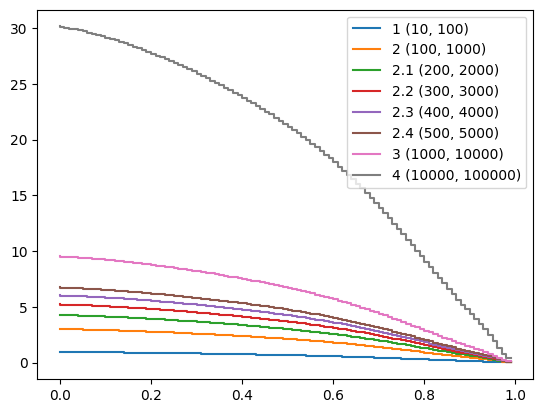

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,1.50257e-07,0
2,100,1000,1,1,100,1000,3.01511,1.50257e-07,0
2.1,200,2000,1,1,200,2000,4.26401,1.50257e-07,0
2.2,300,3000,1,1,300,3000,5.22233,1.50257e-07,0
2.3,400,4000,1,1,400,4000,6.03023,1.50257e-07,0
2.4,500,5000,1,1,500,5000,6.742,1.50257e-07,0
3,1000,10000,1,1,1000,10000,9.53463,1.50257e-07,0
4,10000,100000,1,1,10000,100000,30.1511,1.50257e-07,0


In [ ]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(scenarios)

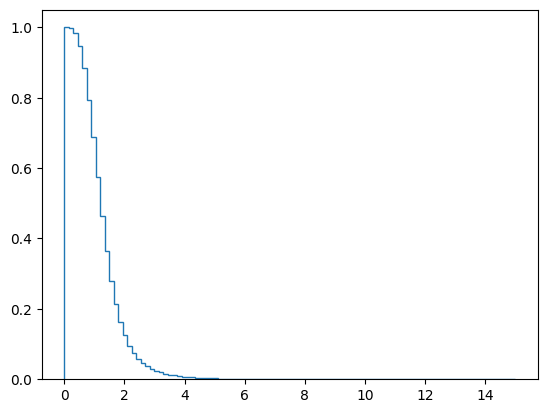

In [ ]:
# Matplotlib
TPR,bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=-1,density=True)

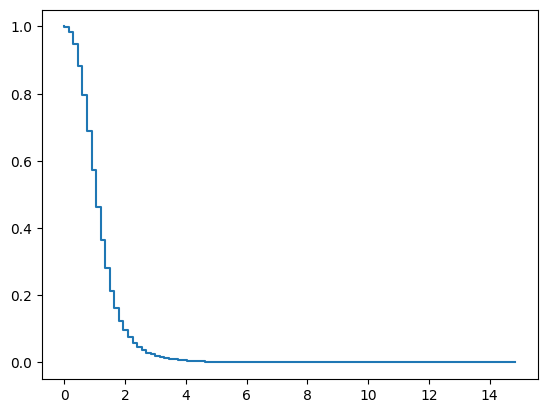

In [ ]:
# compute with numpy
hist,bins_sig=np.histogram(df_sig["M_TR_2"],bins=100,density=True)
TPR = np.cumsum(hist[::-1])[::-1] * (bins_sig[1]-bins_sig[0])

# plot with matplotlib
plt.step(bins_sig[:-1],TPR)
plt.show()

In [ ]:
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

In [ ]:
def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):

    TPR,bins_sig = compute_rate(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[obs_name],bins=bins_sig)

    max_sigs=dict()
    table=list()

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected,
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

In [ ]:
my_obs= ['MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

MET


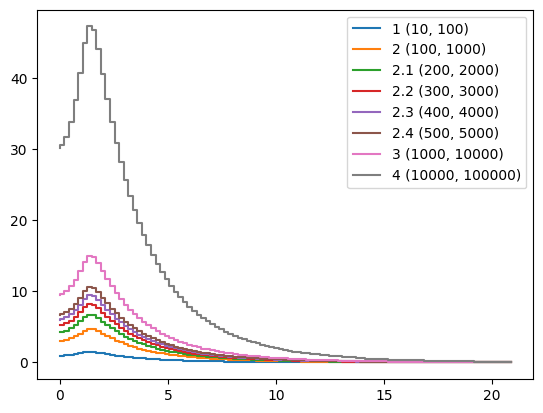

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.349463,0.0198365,3.49463,1.98365,1.49307,1.47506,7
2,100,1000,0.349463,0.0198365,34.9463,19.8365,4.72149,1.47506,7
2.1,200,2000,0.349463,0.0198365,69.8926,39.673,6.6772,1.47506,7
2.2,300,3000,0.349463,0.0198365,104.839,59.5095,8.17786,1.47506,7
2.3,400,4000,0.349463,0.0198365,139.785,79.346,9.44298,1.47506,7
2.4,500,5000,0.349463,0.0198365,174.732,99.1825,10.5576,1.47506,7
3,1000,10000,0.349463,0.0198365,349.463,198.365,14.9307,1.47506,7
4,10000,100000,0.349463,0.0198365,3494.63,1983.65,47.2149,1.47506,7


MET_phi


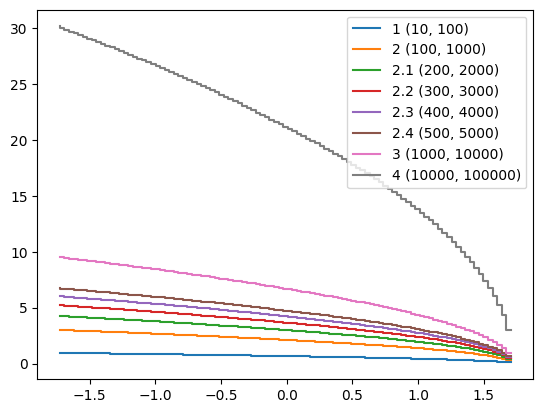

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,-1.72712,0
2,100,1000,1,1,100,1000,3.01511,-1.72712,0
2.1,200,2000,1,1,200,2000,4.26401,-1.72712,0
2.2,300,3000,1,1,300,3000,5.22233,-1.72712,0
2.3,400,4000,1,1,400,4000,6.03023,-1.72712,0
2.4,500,5000,1,1,500,5000,6.742,-1.72712,0
3,1000,10000,1,1,1000,10000,9.53463,-1.72712,0
4,10000,100000,1,1,10000,100000,30.1511,-1.72712,0


MET_rel


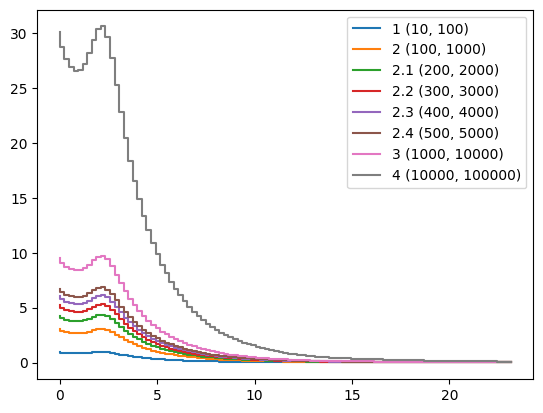

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.142159,0.00731554,1.42159,0.731554,0.96881,2.33864,10
2,100,1000,0.142159,0.00731554,14.2159,7.31554,3.06365,2.33864,10
2.1,200,2000,0.142159,0.00731554,28.4319,14.6311,4.33265,2.33864,10
2.2,300,3000,0.142159,0.00731554,42.6478,21.9466,5.30639,2.33864,10
2.3,400,4000,0.142159,0.00731554,56.8637,29.2621,6.12729,2.33864,10
2.4,500,5000,0.142159,0.00731554,71.0797,36.5777,6.85052,2.33864,10
3,1000,10000,0.142159,0.00731554,142.159,73.1554,9.6881,2.33864,10
4,10000,100000,0.142159,0.00731554,1421.59,731.554,30.6365,2.33864,10


axial_MET


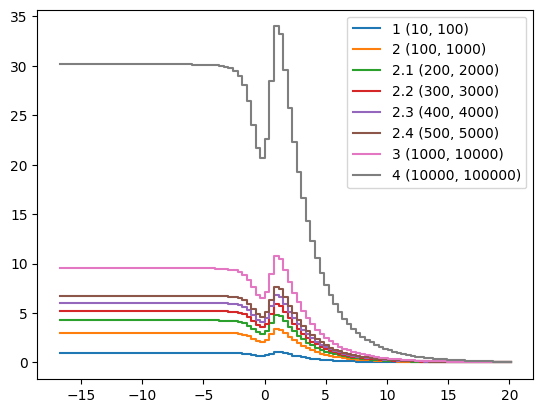

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.160196,0.00620536,1.60196,0.620536,1.07456,1.1405,48
2,100,1000,0.160196,0.00620536,16.0196,6.20536,3.39806,1.1405,48
2.1,200,2000,0.160196,0.00620536,32.0391,12.4107,4.80558,1.1405,48
2.2,300,3000,0.160196,0.00620536,48.0587,18.6161,5.88561,1.1405,48
2.3,400,4000,0.160196,0.00620536,64.0783,24.8214,6.79611,1.1405,48
2.4,500,5000,0.160196,0.00620536,80.0978,31.0268,7.59829,1.1405,48
3,1000,10000,0.160196,0.00620536,160.196,62.0536,10.7456,1.1405,48
4,10000,100000,0.160196,0.00620536,1601.96,620.536,33.9806,1.1405,48


M_R


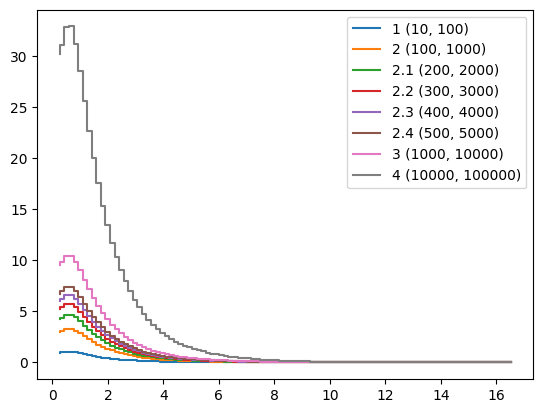

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.731022,0.421495,7.31022,42.1495,1.03945,0.76074,3
2,100,1000,0.731022,0.421495,73.1022,421.495,3.28704,0.76074,3
2.1,200,2000,0.731022,0.421495,146.204,842.99,4.64858,0.76074,3
2.2,300,3000,0.731022,0.421495,219.307,1264.48,5.69332,0.76074,3
2.3,400,4000,0.731022,0.421495,292.409,1685.98,6.57408,0.76074,3
2.4,500,5000,0.731022,0.421495,365.511,2107.47,7.35004,0.76074,3
3,1000,10000,0.731022,0.421495,731.022,4214.95,10.3945,0.76074,3
4,10000,100000,0.731022,0.421495,7310.22,42149.5,32.8704,0.76074,3


M_TR_2


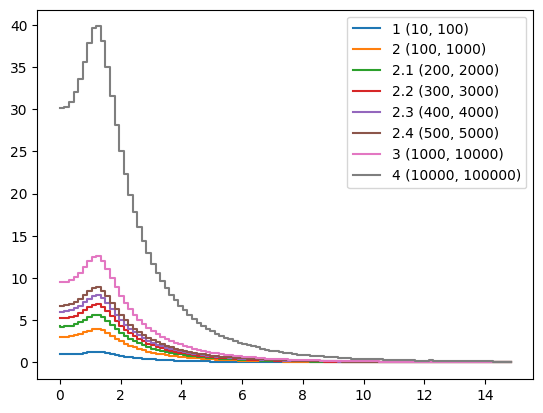

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.363213,0.0469801,3.63213,4.69801,1.25845,1.35029,9
2,100,1000,0.363213,0.0469801,36.3213,46.9801,3.97956,1.35029,9
2.1,200,2000,0.363213,0.0469801,72.6426,93.9601,5.62795,1.35029,9
2.2,300,3000,0.363213,0.0469801,108.964,140.94,6.8928,1.35029,9
2.3,400,4000,0.363213,0.0469801,145.285,187.92,7.95912,1.35029,9
2.4,500,5000,0.363213,0.0469801,181.606,234.9,8.89857,1.35029,9
3,1000,10000,0.363213,0.0469801,363.213,469.801,12.5845,1.35029,9
4,10000,100000,0.363213,0.0469801,3632.13,4698.01,39.7956,1.35029,9


R


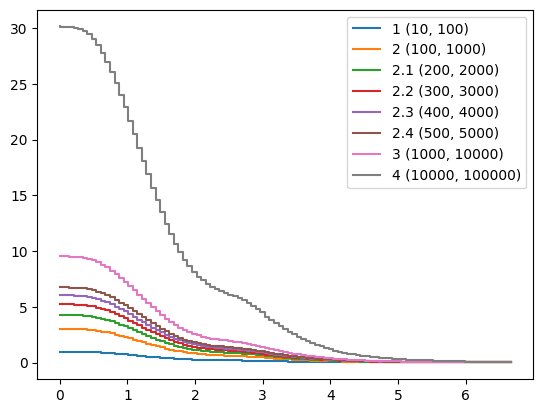

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00204808,0
2,100,1000,1,1,100,1000,3.01511,0.00204808,0
2.1,200,2000,1,1,200,2000,4.26401,0.00204808,0
2.2,300,3000,1,1,300,3000,5.22233,0.00204808,0
2.3,400,4000,1,1,400,4000,6.03023,0.00204808,0
2.4,500,5000,1,1,500,5000,6.742,0.00204808,0
3,1000,10000,1,1,1000,10000,9.53463,0.00204808,0
4,10000,100000,1,1,10000,100000,30.1511,0.00204808,0


MT2


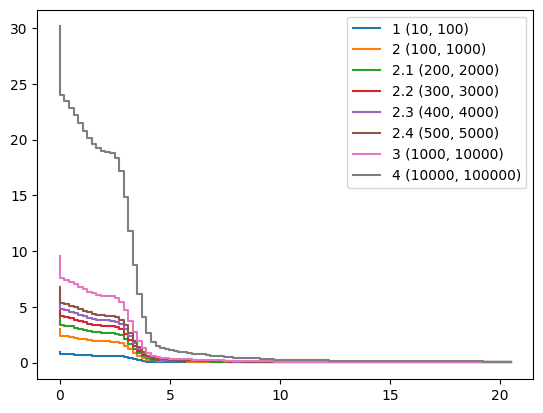

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0,0
2,100,1000,1,1,100,1000,3.01511,0,0
2.1,200,2000,1,1,200,2000,4.26401,0,0
2.2,300,3000,1,1,300,3000,5.22233,0,0
2.3,400,4000,1,1,400,4000,6.03023,0,0
2.4,500,5000,1,1,500,5000,6.742,0,0
3,1000,10000,1,1,1000,10000,9.53463,0,0
4,10000,100000,1,1,10000,100000,30.1511,0,0


S_R


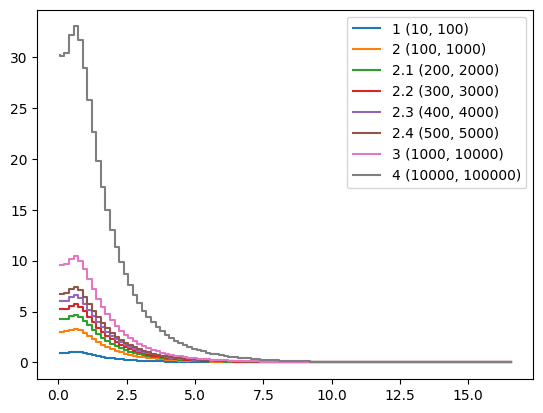

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.777207,0.477283,7.77207,47.7283,1.04325,0.719131,4
2,100,1000,0.777207,0.477283,77.7207,477.283,3.29905,0.719131,4
2.1,200,2000,0.777207,0.477283,155.441,954.566,4.66556,0.719131,4
2.2,300,3000,0.777207,0.477283,233.162,1431.85,5.71412,0.719131,4
2.3,400,4000,0.777207,0.477283,310.883,1909.13,6.5981,0.719131,4
2.4,500,5000,0.777207,0.477283,388.604,2386.41,7.3769,0.719131,4
3,1000,10000,0.777207,0.477283,777.207,4772.83,10.4325,0.719131,4
4,10000,100000,0.777207,0.477283,7772.07,47728.3,32.9905,0.719131,4


M_Delta_R


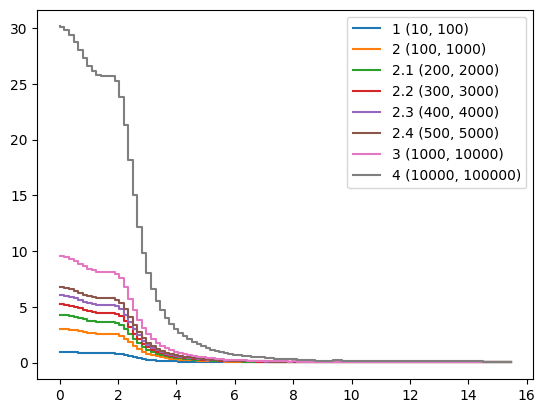

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
2.1,200,2000,1,1,200,2000,4.26401,0.00445562,0
2.2,300,3000,1,1,300,3000,5.22233,0.00445562,0
2.3,400,4000,1,1,400,4000,6.03023,0.00445562,0
2.4,500,5000,1,1,500,5000,6.742,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


dPhi_r_b


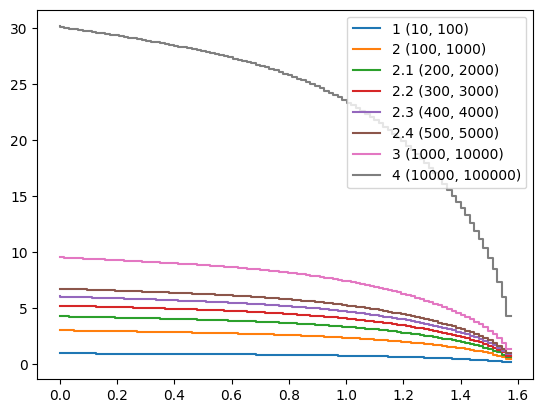

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,2.45273e-06,0
2,100,1000,1,1,100,1000,3.01511,2.45273e-06,0
2.1,200,2000,1,1,200,2000,4.26401,2.45273e-06,0
2.2,300,3000,1,1,300,3000,5.22233,2.45273e-06,0
2.3,400,4000,1,1,400,4000,6.03023,2.45273e-06,0
2.4,500,5000,1,1,500,5000,6.742,2.45273e-06,0
3,1000,10000,1,1,1000,10000,9.53463,2.45273e-06,0
4,10000,100000,1,1,10000,100000,30.1511,2.45273e-06,0


cos_theta_r1


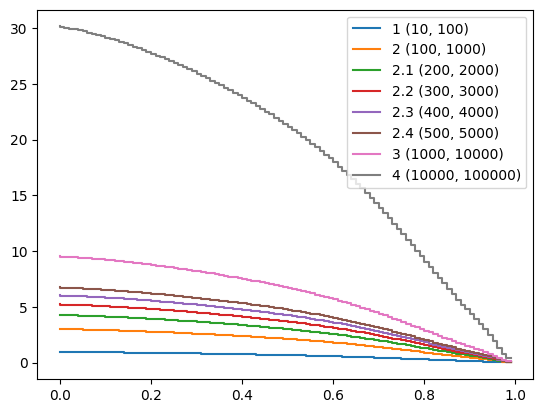

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,1.50257e-07,0
2,100,1000,1,1,100,1000,3.01511,1.50257e-07,0
2.1,200,2000,1,1,200,2000,4.26401,1.50257e-07,0
2.2,300,3000,1,1,300,3000,5.22233,1.50257e-07,0
2.3,400,4000,1,1,400,4000,6.03023,1.50257e-07,0
2.4,500,5000,1,1,500,5000,6.742,1.50257e-07,0
3,1000,10000,1,1,1000,10000,9.53463,1.50257e-07,0
4,10000,100000,1,1,10000,100000,30.1511,1.50257e-07,0


In [ ]:
for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




(array([ 53127., 126274., 229160., 333589., 401544., 401106., 334161.,
        228592., 127129.,  53145.]),
 array([-2.10291862e+00, -1.68246710e+00, -1.26201558e+00, -8.41564059e-01,
        -4.21112537e-01, -6.61015511e-04,  4.19790506e-01,  8.40242028e-01,
         1.26069355e+00,  1.68114507e+00,  2.10159659e+00]),
 <BarContainer object of 10 artists>)

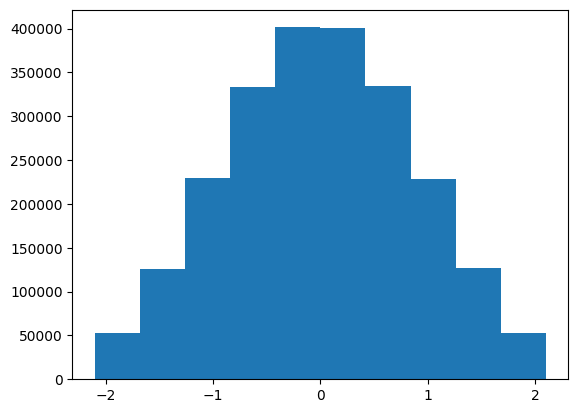

In [ ]:
def AUC(TPR,FPR):
    n = FPR.shape[0]
    return np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2)

plt.hist(df_sig["l_1_eta"])

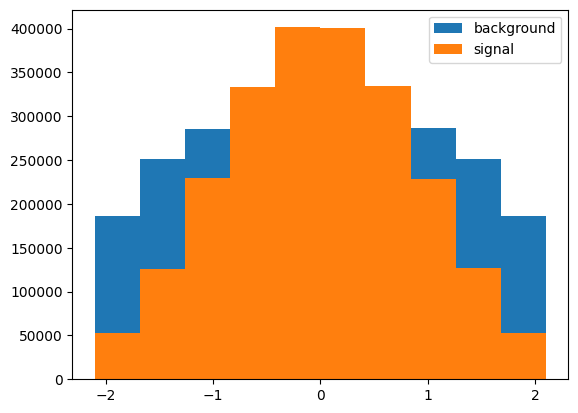

In [ ]:
plt.hist(df_bkg["l_1_eta"],label="background")
plt.hist(df_sig["l_1_eta"],label="signal")
plt.legend()

(array([329754., 335882., 338251., 316553., 295960., 249267., 188562.,
        125862.,  72500.,  35236.]),
 array([1.81198120e-06, 3.20293493e-01, 6.40585175e-01, 9.60876856e-01,
        1.28116854e+00, 1.60146022e+00, 1.92175190e+00, 2.24204358e+00,
        2.56233526e+00, 2.88262694e+00, 3.20291862e+00]),
 <BarContainer object of 10 artists>)

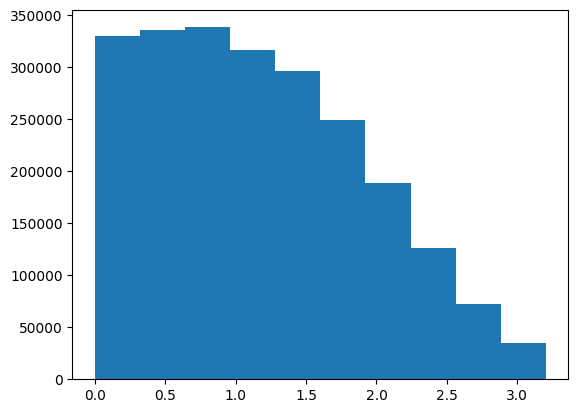

In [ ]:
plt.hist(np.abs(df_sig["l_1_eta"]-1.1))

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [ ]:
def AUC(TPR,FPR):
    n = FPR.shape[0]
    return np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2)

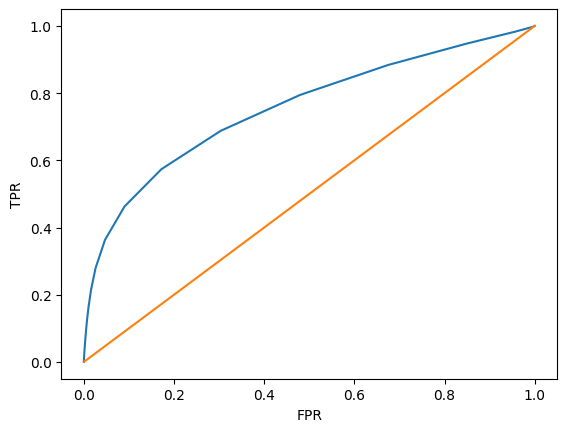

In [ ]:
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1])

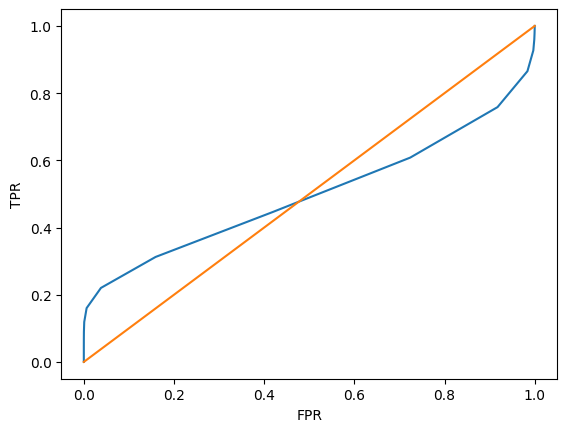

In [ ]:
plt.plot(FPR1,TPR1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1])

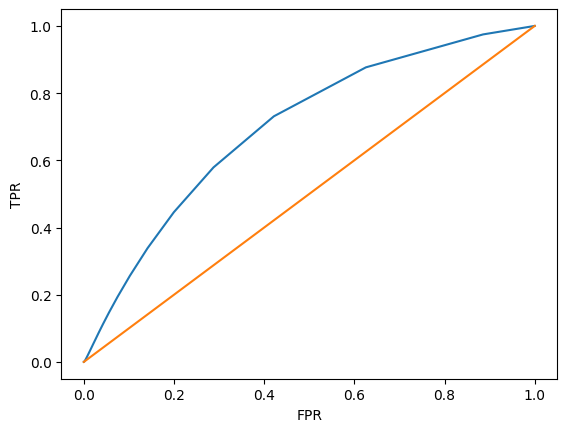

In [ ]:
plt.plot(FPR2,TPR2)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1])

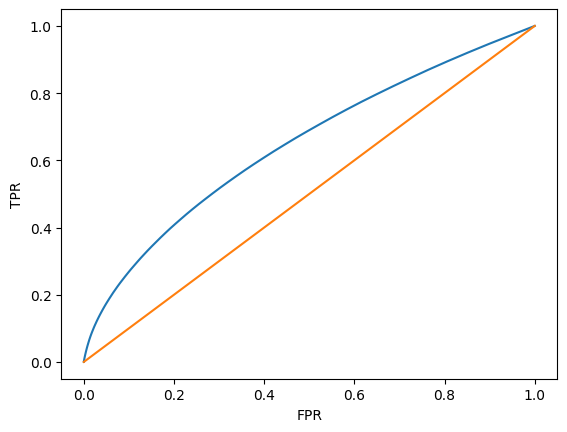

In [ ]:
plt.plot(FPR3,TPR3)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1])

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$.

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5?

In [ ]:
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

df_sig_0

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [ ]:
m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

delta = m_s-m_b
delta

l_1_pT          0.534471
l_1_eta        -0.000660
l_1_phi        -0.000928
l_2_pT          0.255800
l_2_eta         0.000765
l_2_phi        -0.000199
MET             0.768856
MET_phi         0.000220
MET_rel         0.505262
axial_MET       0.154960
M_R             0.336500
M_TR_2          0.495985
R               0.105791
MT2             0.136978
S_R             0.321855
M_Delta_R       0.341800
dPhi_r_b        0.028585
cos_theta_r1    0.106272
dtype: float64

In [ ]:
delta=np.matrix(m_s-m_b).transpose()

S_B= delta*delta.transpose()
S_B

matrix([[ 2.85659103e-01, -3.52809644e-04, -4.96156489e-04,
          1.36717519e-01,  4.08806287e-04, -1.06310408e-04,
          4.10931386e-01,  1.17828594e-04,  2.70047689e-01,
          8.28218385e-02,  1.79849669e-01,  2.65089747e-01,
          5.65419449e-02,  7.32109964e-02,  1.72022353e-01,
          1.82682327e-01,  1.52779431e-02,  5.67995029e-02],
        [-3.52809644e-04,  4.35745417e-07,  6.12789134e-07,
         -1.68856020e-04, -5.04905320e-07,  1.31301040e-07,
         -5.07529970e-04, -1.45526832e-07, -3.33528420e-04,
         -1.02290958e-04, -2.22127344e-04, -3.27405003e-04,
         -6.98333898e-05, -9.04208734e-05, -2.12460043e-04,
         -2.25625882e-04, -1.88693643e-05, -7.01514925e-05],
        [-4.96156489e-04,  6.12789134e-07,  8.61765858e-07,
         -2.37462358e-04, -7.10048762e-07,  1.84648760e-07,
         -7.13739809e-04, -2.04654502e-07, -4.69041288e-04,
         -1.43851858e-04, -3.12377864e-04, -4.60429922e-04,
         -9.82067528e-05, -1.27158948e

In [ ]:
df_sig_0-m_s

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,0.377740,0.064527,-1.224618,-0.632083,-0.339317,1.672670,2.058436,-1.219291,-1.262554,3.691167,-0.136912,-0.700944,-0.575372,-1.074723,-0.726287,-0.980241,0.306903,0.095024
2,-0.845393,-0.133962,-0.709418,-0.686466,-1.614249,-0.768533,-0.197111,0.503871,0.555739,-0.515392,-0.656606,-0.327482,0.530234,0.949585,-0.571200,0.376778,0.120464,-0.101650
3,-0.908977,-0.975809,0.693706,-0.689226,0.891375,-0.677201,0.616031,1.532886,1.770751,-1.089292,-0.613503,-0.253784,0.524916,0.477191,-0.413482,0.529867,0.477266,-0.191841
4,0.019763,-0.689753,-0.675706,0.451098,-0.693703,0.623035,-0.329467,-0.381897,-0.686304,1.281472,-0.003594,-0.300777,-0.328738,-1.074723,-0.091540,-1.142167,0.139863,-0.187701
8,0.822579,0.743319,-0.329986,-0.332932,-0.029265,-1.446551,0.882917,1.450274,1.713602,-1.978777,0.262235,1.279171,0.507420,1.318909,0.379869,0.962872,0.164126,0.405497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,-0.339115,-1.024784,0.736309,-0.065743,-1.268792,-1.365250,-0.920987,-1.378906,-1.248063,0.157192,-0.341678,-0.542985,-0.291436,-1.074723,-0.357870,-0.885477,-0.256432,-0.022887
4999988,0.749568,0.851638,0.125782,-0.204041,0.551300,-0.811171,0.185733,-0.852668,-1.066474,0.328383,0.188064,0.315094,-0.031946,-0.872283,-0.071867,-0.580399,-0.275588,0.329626
4999991,-0.258532,0.648347,-1.616156,-0.605273,1.662669,-1.243679,-0.710289,0.189760,-0.841952,-0.477309,-0.373259,-0.181777,0.134344,0.897640,-0.476684,0.378604,-0.979630,0.221877
4999995,-0.436908,-0.961446,-1.486724,-0.459995,0.493202,1.648097,0.426838,0.276799,-0.250404,-1.570542,-0.290010,0.415433,0.616784,2.291575,-0.127990,1.461053,0.374235,0.082039


In [ ]:
delta_s=np.matrix(df_sig_0-m_s).transpose()
S_W_s= delta_s*delta_s.transpose()
delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()

In [ ]:
S_W=S_W_s+S_W_b
S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()
w_1 = w / sum(w)
w_1

matrix([[ 2.88602495e-01],
        [-1.11300688e-04],
        [-5.56684224e-04],
        [ 1.35574227e-01],
        [ 2.89548993e-04],
        [-4.49555754e-05],
        [ 2.13426354e-01],
        [ 5.09145386e-04],
        [ 1.83823569e-02],
        [ 3.53377710e-02],
        [-3.33605969e-02],
        [ 1.41997278e-02],
        [-2.69411004e-01],
        [-4.38932247e-02],
        [-2.39482198e-01],
        [ 2.22286404e-01],
        [-1.15485455e-02],
        [ 6.69800479e-01]])

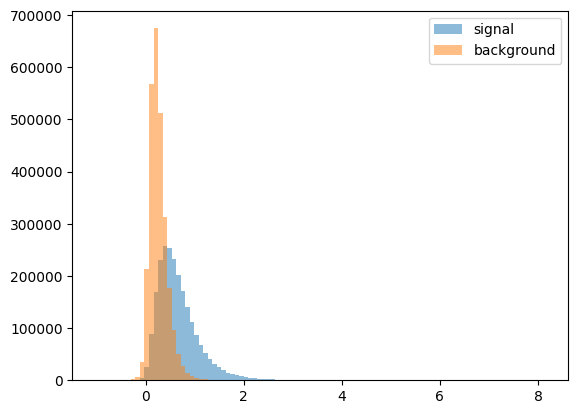

In [ ]:
output_s=np.matrix(df_sig_0)*w_1
output_b=np.matrix(df_bkg_0)*w_1

h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()